# Distribution of Ford GoBike Trips Based on Time of Day, Day of Week and Riders(Users).
## by Robert Gitahi

## Investigation Overview

In this investigation, I wanted to look at how the duration of bike trips are affected by certain variables. The variables in question are time of day, day of the week and type of user.


## Dataset Overview

The data consists of information regarding 183,411 rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains 18 columns and 183411 records/rows. 9 numerical, 2 string/object, 3 boolean datatypes and 2 datetime. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_gb = pd.read_csv('fordgobike.csv')

In [3]:
# Converting bike_share_for_all_trip, member_gender, user_type into categorical datatype
ordinal_var_dict = {'user_type': ['Customer','Subscriber'],
                    'member_gender': ['Male', 'Other', 'Female'],
                    'bike_share_for_all_trip': ['Yes', 'No']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_gb[var] = df_gb[var].astype(ordered_var)


In [4]:
#change the data type of  start_time  & end_time to datetime64
df_gb = df_gb.astype({"start_time":'datetime64', "end_time":'datetime64'})

In [5]:
# splitting start and end times into days and hours for use in our analysis
df_gb['start_time'] = pd.to_datetime(df_gb['start_time'])
df_gb['end_time'] = pd.to_datetime(df_gb['end_time'])
df_gb['start_day'] = df_gb['start_time'].dt.day_name()
#df_gb['start_month'] = df_gb['start_time'].dt.month_name()
#df_gb['start_year'] = df_gb['start_time'].dt.year
df_gb['start_hr'] = df_gb['start_time'].dt.hour
df_gb['start_hr'] = df_gb.start_hr.astype(str)

df_gb['end_day'] = df_gb['end_time'].dt.day_name()
df_gb['end_hr'] = df_gb['end_time'].dt.hour
df_gb['end_hr'] = df_gb.start_hr.astype(str)

## Trip Distribution in Seconds

The trip duration dataset was plotted on a logarithmic scale due to the large range of values. On the logarithmic scale the distribution takes a normal distribution shape.

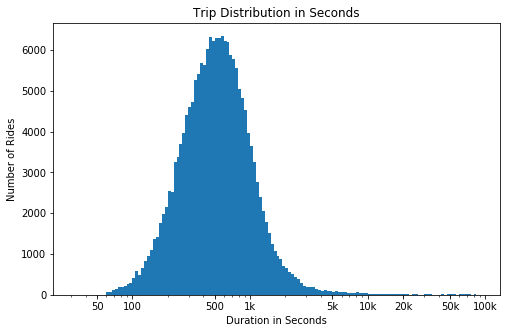

In [6]:
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(df_gb['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_gb, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.title('Trip Distribution in Seconds')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Rides');

## Trip Distributionper Days of the week

Most bike trips happened on Thursdays followed by Tuesdays. Wednesday, Friday and Monday seem to be close in terms of bike trips. Saturday and Sunday has the lowest number of bike trips. 

In [7]:
# Distribution of trips within the days of the week
#first we arrange the days of the week and hours in order
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_gb[var] = df_gb[var].astype(ordered_var)

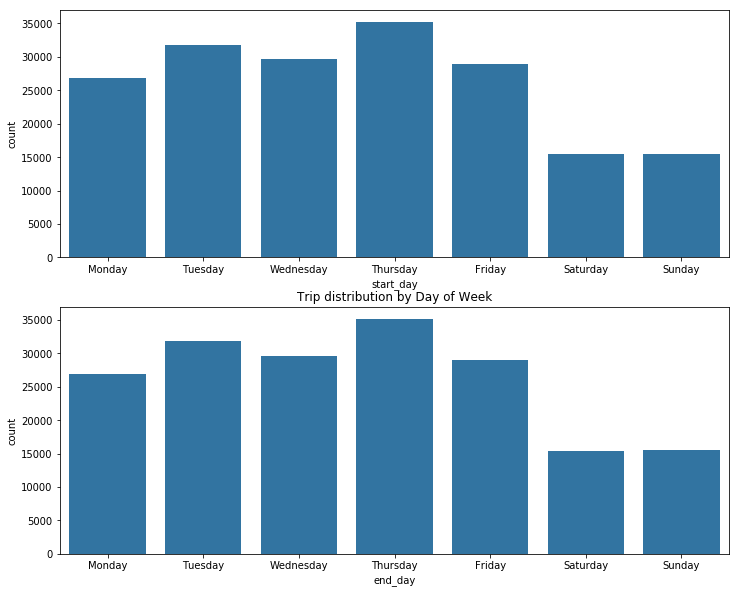

In [8]:
fig, ax = plt.subplots(2, figsize = [12,10])
default_color = sb.color_palette()[0]
plt.title('Trip distribution by Day of Week')
sb.countplot(data = df_gb, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = df_gb, x = 'end_day', color = default_color,  ax = ax[1]);

## Trip Distribution per Hour of Day

The highest recorded trip times are in the 8th - 9th and 17th - 18th hour of the day. The lowest activity happens between the hours of 0000hrs - 0500hrs. Based on this observation, we can deduce that the peak hours are rush hours when users are trying to get ot work or are coming from work.

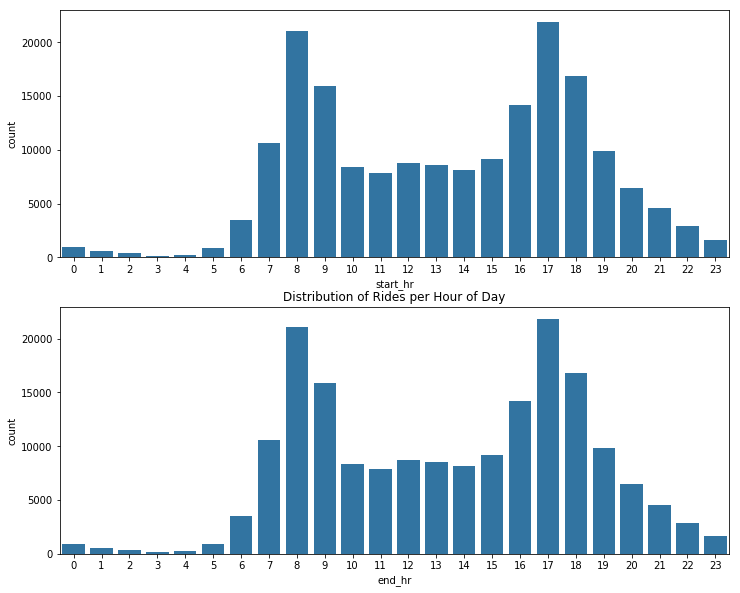

In [9]:
fig, ax = plt.subplots(2,figsize = [12,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_gb, x = 'start_hr', color = default_color,  ax = ax[0])
plt.title('Distribution of Rides per Hour of Day')
sb.countplot(data = df_gb, x = 'end_hr', color = default_color, ax = ax[1]);

## Trip Distribution by Gender

This observation shows that the females and other gender take a slighlty longer time the males for the rides.

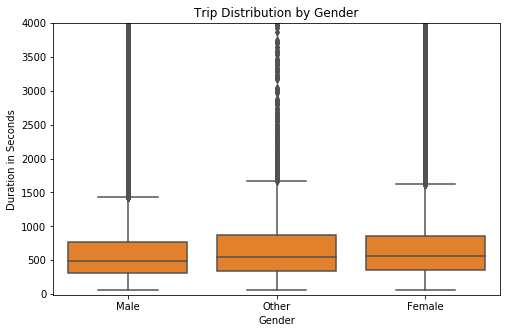

In [10]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df_gb, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 4000])
plt.title('Trip Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration in Seconds')
plt.show()

## Trip Distribution by User Type

This obervation indicates that subscribers are spending more time on their rides, and most are using about 1000 seconds between their start and end points compared the customers.

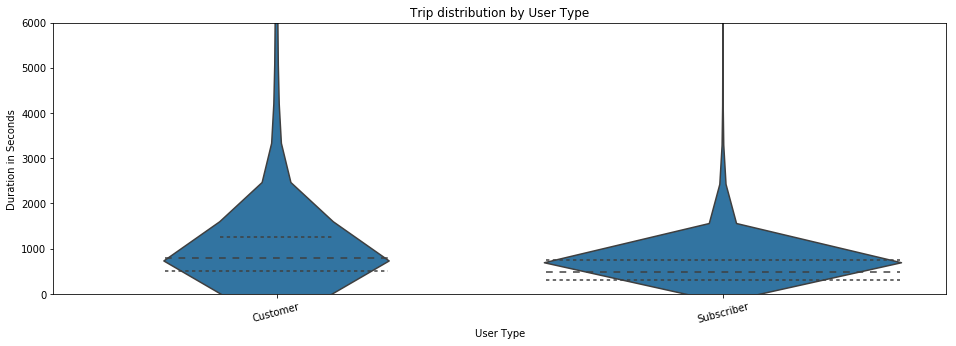

In [11]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df_gb, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.ylim([-10, 6000])
plt.xticks(rotation=15)
plt.title('Trip distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in Seconds')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Project_FordGoBike_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_FordGoBike_Part2.ipynb to slides
[NbConvertApp] Writing 393380 bytes to Project_FordGoBike_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Project_FordGoBike_Part2.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open:

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
